# SQL Queries

In [1]:
import pandas as pd
import sqlite3 as sq

df = pd.read_csv('../../data/processed/processed_data.csv')
print(df.columns.tolist())
print(df.head(3))

['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName', '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31', '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31', '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30', '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31', '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31', '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30', '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31', '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31', '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31', '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30', '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31', '2004-09-30', '2004-10-31', '2004-11-30', '2004-12-31', '2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30'

In [2]:
conn = sq.connect(':memory:')

df.to_sql('austin_housing', conn, index=False)

query = """SELECT RegionName, 
    current_price_2025 
    FROM austin_housing 
    WHERE current_price_2025 > 400000"""

results = pd.read_sql(query, conn)

results.head()

,RegionName,current_price_2025
0,West Oak Hill,591620.958501
1,Windsor Park,450649.412230
2,Downtown,653213.588039
3,Allandale,769001.814422
4,Brentwood,607800.434506


In [3]:
# Task 1: Simple Aggregation

# **Business question:** "What's the average current price and average occupancy rate across all neighborhoods?"

# Write a query that shows:
# - COUNT of neighborhoods
# - AVG of current_price_2025
# - AVG of occupancy_rate
# No GROUP BY needed - just aggregate the whole table.

task1_query = """SELECT
    COUNT(*),
    AVG(current_price_2025),
    AVG(occupancy_rate)
    FROM austin_housing
"""
task1_results = pd.read_sql(task1_query, conn)
task1_results.head()

,COUNT(*),AVG(current_price_2025),AVG(occupancy_rate)
0,56,569325.585626,29.857143


In [4]:
# Task 2: GROUP BY with Multiple Filters

# **Business question:** "Which neighborhoods have average STR cash flow above $500 and at least 50 listings?"

# Write a query combining:

# - WHERE (filter out neighborhoods with NULL cash flow)
# - GROUP BY RegionName
# - Calculate AVG(str_monthly_cash_flow) and COUNT(listing_count)
# - HAVING (filter groups where avg cash flow > 500 AND listing count >= 50)
# - ORDER BY average cash flow (highest first)

task2_query = """SELECT RegionName,
    AVG(str_monthly_cash_flow) AS avg_str_monthly_cash_flow,
    SUM(listing_count) AS total_listings
    FROM austin_housing
    WHERE str_monthly_cash_flow IS NOT NULL
    GROUP BY RegionName
    HAVING avg_str_monthly_cash_flow > 500 AND total_listings >= 50
    ORDER BY avg_str_monthly_cash_flow DESC
"""
task2_results = pd.read_sql(task2_query, conn)
task2_results.head()

,RegionName,avg_str_monthly_cash_flow,total_listings
0,Downtown,971.992387,181
1,Upper Boggy Creek,633.091167,93


In [5]:
# Task 3: Multiple Aggregations by Group

# **Business question:** "For each neighborhood, show cash flow statistics"

# Write a query that groups by RegionName and shows:

# - COUNT of properties
# - AVG of str_monthly_cash_flow
# - MIN of str_monthly_cash_flow
# - MAX of str_monthly_cash_flow

# Order by average cash flow descending.

task3_query = """SELECT RegionName,
    SUM(listing_count) AS total_listings,
    AVG(str_monthly_cash_flow) AS avg_mo_cash_flow,
    MIN(str_monthly_cash_flow) AS min_mo_cash_flow,
    MAX(str_monthly_cash_flow) AS max_mo_cash_flow
    FROM austin_housing
    GROUP BY RegionName
    ORDER BY avg_mo_cash_flow DESC
"""
task3_results = pd.read_sql(task3_query, conn)
task3_results.head()

,RegionName,total_listings,avg_mo_cash_flow,min_mo_cash_flow,max_mo_cash_flow
0,Coronado Hills,26,5070.504484,5070.504484,5070.504484
1,Downtown,181,971.992387,971.992387,971.992387
2,North Lamar,10,855.798289,855.798289,855.798289
3,Georgian Acres,24,712.700414,712.700414,712.700414
4,Upper Boggy Creek,93,633.091167,633.091167,633.091167


In [6]:
conn.close()

# Correlation Basics

In [7]:
df = pd.read_csv('../../data/processed/processed_data.csv')
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,2000-01-31,...,median_bedrooms,occupancy_rate,listing_count,estimated_ltr_monthly_rent,str_rent_to_price_ratio,ltr_rent_to_price_ratio,monthly_costs,str_monthly_cash_flow,ltr_monthly_cash_flow,str_vs_ltr_cashflow_delta
0,416968,768,West Oak Hill,neighborhood,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,225656.567739,...,2.0,42.0,61,1080.00,5.476479,2.190592,4480.002356,-1780.002356,-3400.002356,1620.00
1,271652,992,Windsor Park,neighborhood,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,225656.567739,...,2.0,36.0,173,807.84,5.377839,2.151136,3412.506605,-1392.906605,-2604.666605,1211.76
2,275057,1156,Pleasant Valley,neighborhood,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,116702.212787,...,2.0,0.0,39,97.92,1.103153,0.441261,2016.469971,-1771.669971,-1918.549971,146.88
3,271391,1205,Franklin Park,neighborhood,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,76944.526694,...,3.0,36.0,14,812.16,9.083894,3.633558,2031.072669,-0.672669,-1218.912669,1218.24
4,271353,1435,Downtown,neighborhood,TX,TX,Austin,"Austin-Round Rock-Georgetown, TX",Travis County,76944.526694,...,2.0,0.0,181,2367.36,10.872523,4.349009,4946.407613,971.992387,-2579.047613,3551.04


In [15]:
# Task 1: Calculate correlation between two numeric columns in your Austin data

correlation = df['current_price_2025'].corr(df['str_monthly_cash_flow'])
print(f"The Correlation is: {correlation:.3f}")

The Correlation is: -0.865


**Task 2:** Interpret the correlation coefficient:

- Is it positive or negative?
- Is it strong (>0.7), moderate (0.3-0.7), or weak (<0.3)?
- What does this tell you about the relationship?

**At -0.8654612900867231, there is a very strong negative correlation between the current home price, and the STR monthly cash flow. Indicating that the more expensive the home, the smaller the margins get for a positive monthly return/cashflow.**

# Scatter Plots

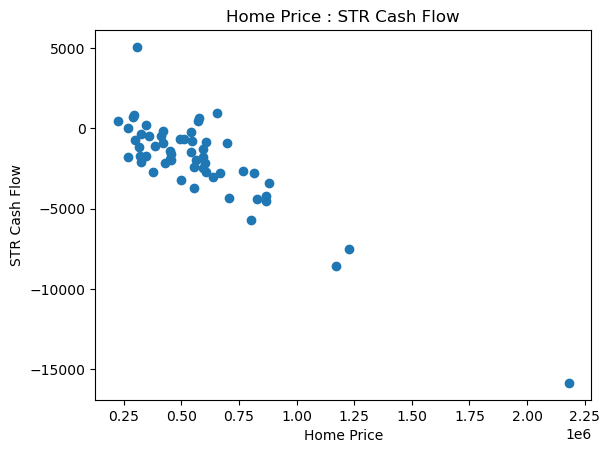

In [16]:
import matplotlib.pyplot as plt

plt.scatter(df['current_price_2025'], df['str_monthly_cash_flow'])
plt.title('Home Price : STR Cash Flow')
plt.xlabel('Home Price')
plt.ylabel('STR Cash Flow')
plt.show()

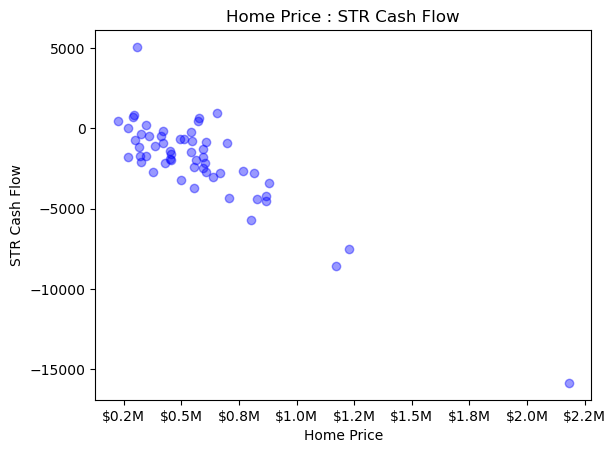

In [26]:
# **Task 2:** Enhance the scatter plot:

# - Add color based on third variable (like property type)
# - Adjust point size or transparency
# - Save figure to visuals folder

plt.scatter(df['current_price_2025'], df['str_monthly_cash_flow'],alpha=0.4,c='blue')
plt.title('Home Price : STR Cash Flow')
plt.xlabel('Home Price')
plt.ylabel('STR Cash Flow')
import matplotlib.ticker as ticker
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.savefig('../../visuals/price_cashflow_scatterplot.png')
plt.show()

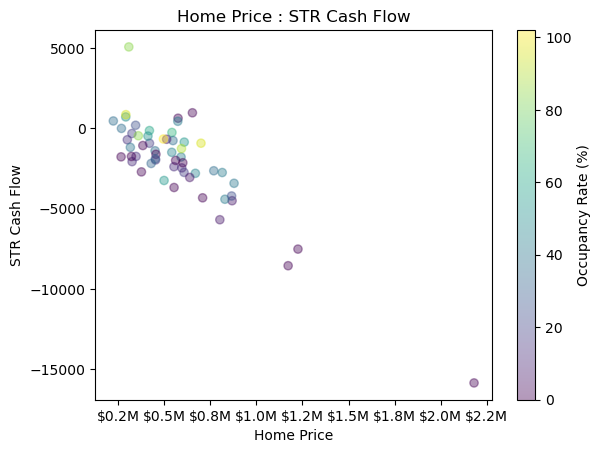

In [27]:
plt.scatter(df['current_price_2025'], df['str_monthly_cash_flow'],alpha=0.4,c=df['occupancy_rate'])
plt.title('Home Price : STR Cash Flow')
plt.xlabel('Home Price')
plt.ylabel('STR Cash Flow')
plt.colorbar(label='Occupancy Rate (%)')
import matplotlib.ticker as ticker
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.savefig('../../visuals/price_cashflow_scatterplot2.png')
plt.show()

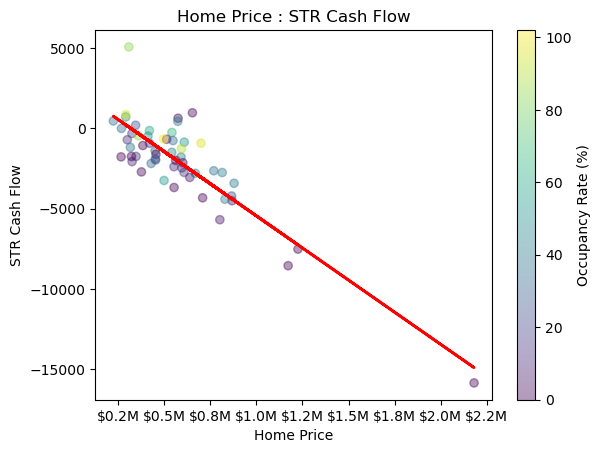

In [28]:
import numpy as np

slope, intercept = np.polyfit(df['current_price_2025'],df['str_monthly_cash_flow'],1)
line_y = slope * df['current_price_2025'] + intercept

plt.scatter(df['current_price_2025'], df['str_monthly_cash_flow'],alpha=0.4,c=df['occupancy_rate'])
plt.title('Home Price : STR Cash Flow')
plt.xlabel('Home Price')
plt.ylabel('STR Cash Flow')
plt.colorbar(label='Occupancy Rate (%)')
plt.plot(df['current_price_2025'],line_y,color='red',linewidth=2)
import matplotlib.ticker as ticker
ax = plt.gca()  # Get current axis
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.savefig('../../visuals/price_cashflow_scatterplot3.png')
plt.show()